### 데이터 증폭과정(jupyter lab 권장.....)

In [37]:
%run flowers_init.ipynb

In [38]:
xs, ys = flowers_init([100,100])

dname : daisy
subpath : dataset/flowers//daisy
filenames :
 ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname : dandelion
subpath : dataset/flowers//dandelion
filenames :
 ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname : rose
subpath : dataset/flowers//rose
filenames :
 ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname : sunflower
subpath : dataset/flowers//sunflower
filenames :
 ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname : tulip
subpath : dataset/flowers//tulip
filenames :
 ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [39]:
#종속변수를 만들어주는 함수. 원핫 인코딩

def onehot(idxs,cnt):
    return np.eye(ent)[idxs]

In [40]:
cnt=5

np.eye(cnt)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [41]:
#이미지 데이터를 증폭시켜주기 위한 라이브러리 불러오기

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
# 이미지 증폭을 위한 몇가지 파라미터, 제어
# 정규화를 왜 할까??? 퀴즈. 속도관련, 차원관련.
image_generator = ImageDataGenerator(rotation_range = 10,
                                     zoom_range = 0.10,
                                     shear_range = 0.5, 
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     horizontal_flip = True,
                                     vertical_flip = True)


In [43]:
# 이미지 정규화 과정
xs_norm = xs / 255.0

# 데이터 셔플링 과정 
# 셔플맵 생성 과정
shuffle_map = np.arange(xs_norm.shape[0])
# 셔플맵 뒤섞기
np.random.shuffle(shuffle_map)

print(shuffle_map[:10])

# 학습 / 테스트 분류 과정
# 학습 데이터 비율 설정 및 나눠지는 위치 값 설정
train_ratio = 0.8
test_begin_index = int(xs_norm.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

# 테스트 및 학습 데이터 나눠주는 과정
train_x = xs_norm[shuffle_map[:test_begin_index]]
test_x  = xs_norm[shuffle_map[test_begin_index:]]

train_y = ys[shuffle_map[:test_begin_index]]
test_y  = ys[shuffle_map[test_begin_index:]]

print(train_x.shape)
print(test_x.shape)

print(train_y.shape)
print(test_y.shape)

[ 456 3660 2068   19 2154 3149 2056  235 1550 1283]
test_begin_index :  3453
(3453, 100, 100, 3)
(864, 100, 100, 3)
(3453, 5)
(864, 5)


In [44]:
import numpy as np
# 사용할 함수 np.tile() -> 이 함수에 넣어준 값을 반복해주는 함수
# np
augment_size = 100
x_augment = image_generator.flow(x = np.tile(A = train_x[0].reshape(100*100*3),reps = 100).reshape(-1, 100, 100, 3),
                                # y값(종속)은 지금 당장 필요 없기에 np.zeros()를 통해 처리 
                                y = np.zeros(augment_size),
                                # 동시에 몇 개 만들꺼냐
                                batch_size = augment_size,
                                # 만들어진 이미지가 중복을 허용할 것이냐.
                                # next()[0] 함수 사용시 독립변수를 가져온다, 만약 [1]을 사용하면은 종속변수. 
                                shuffle = False).next()[0]

In [46]:
x_augment.shape

(100, 100, 100, 3)

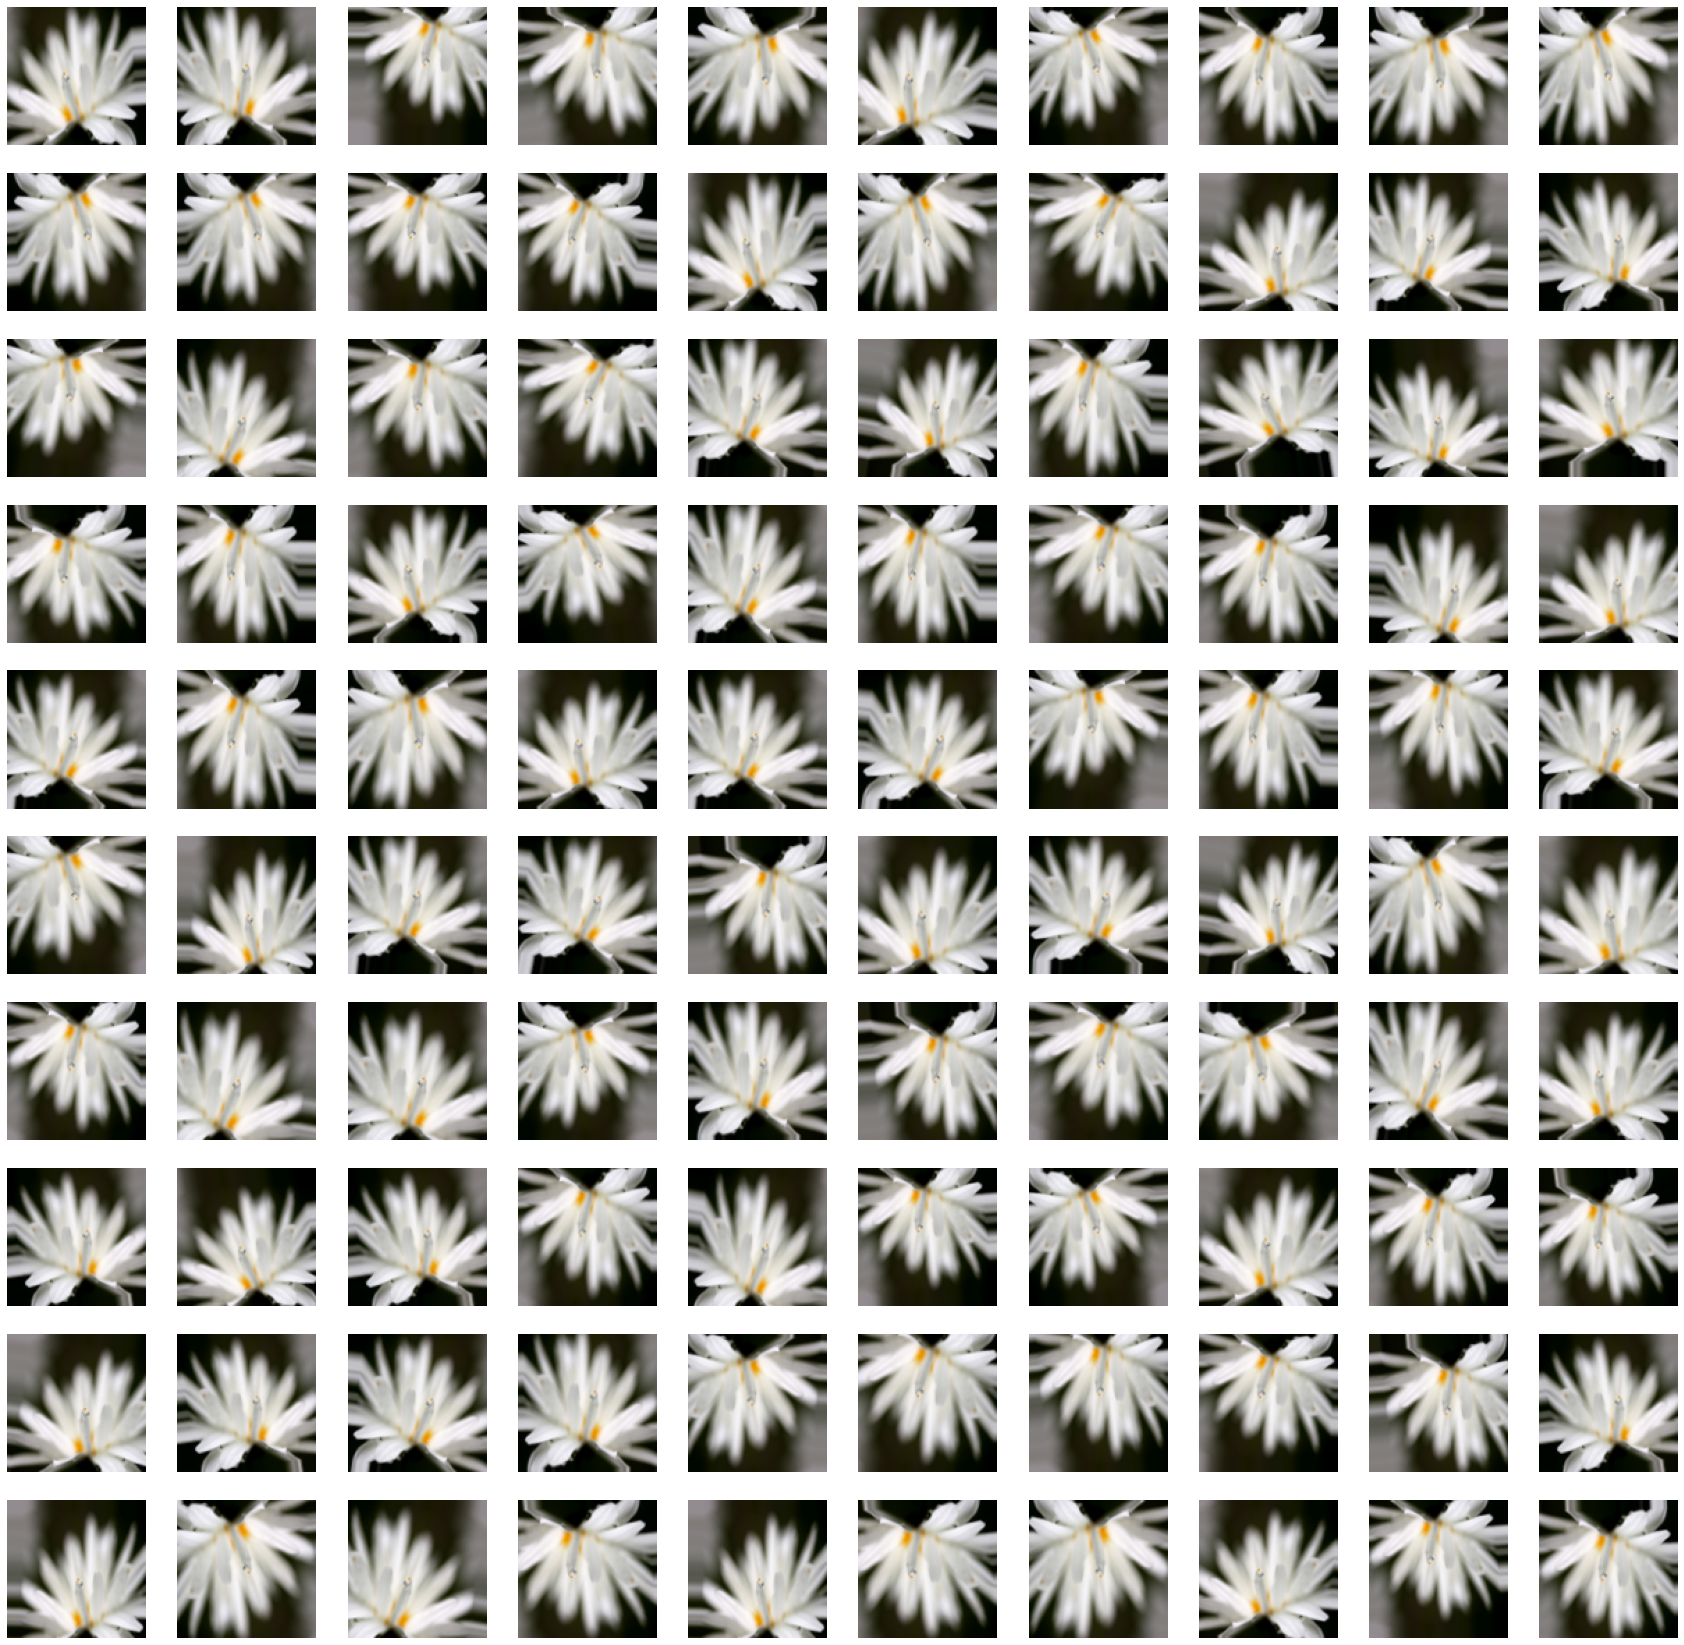

In [49]:
plt.figure(figsize=(30,30))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    i = np.random.choice(100, replace =False)
    plt.imshow(x_augment[i])
plt.show()

In [51]:
x_choice= np.random.choice(train_x.shape[0],
                size=int(train_x.shape[0]*0.5),
                replace=False)

x_augmented = train_x[x_choice].copy()
print(x_augmented.shape)

y_augmented = train_y[x_choice].copy()
print(y_augmented.shape)

(1726, 100, 100, 3)
(1726, 5)


In [52]:
# 학습 데이터 전체를 50% 만큼 증폭 시키는 과정

# 전체 데이터의 개수
print("학습 데이터의 개수 : ", train_x.shape[0])

# 증폭시킬 데이터의 개수(50%)
print("증폭시켜줄 데이터의 양 : ", int(train_x.shape[0] * 0.5))
augment_size = int(train_x.shape[0] * 0.5)


학습 데이터의 개수 :  3453
증폭시켜줄 데이터의 양 :  1726


In [53]:
# 데이터 복사본을 만들어 주는 과정 

x_choice = np.random.choice(train_x.shape[0], 
                            size = int(train_x.shape[0] * 0.5), 
                            replace = False)

# 독립변수의 복사본 만들어 주는 과정 
x_augmented = train_x[x_choice].copy()
print("x_augmented.shape : ", x_augmented.shape)

# 종속변수의 복사본 만들어 주는 과정
y_augmented = train_y[x_choice].copy()
print("y_augmented.shape : ", y_augmented.shape)

x_augmented.shape :  (1726, 100, 100, 3)
y_augmented.shape :  (1726, 5)


In [54]:
x_augmented = image_generator.flow(x_augmented,
                                   np.zeros(augment_size),
                                   batch_size = augment_size,
                                   shuffle = False).next()[0]

print("x_augmented.shape", x_augmented.shape)

x_augmented.shape (1726, 100, 100, 3)


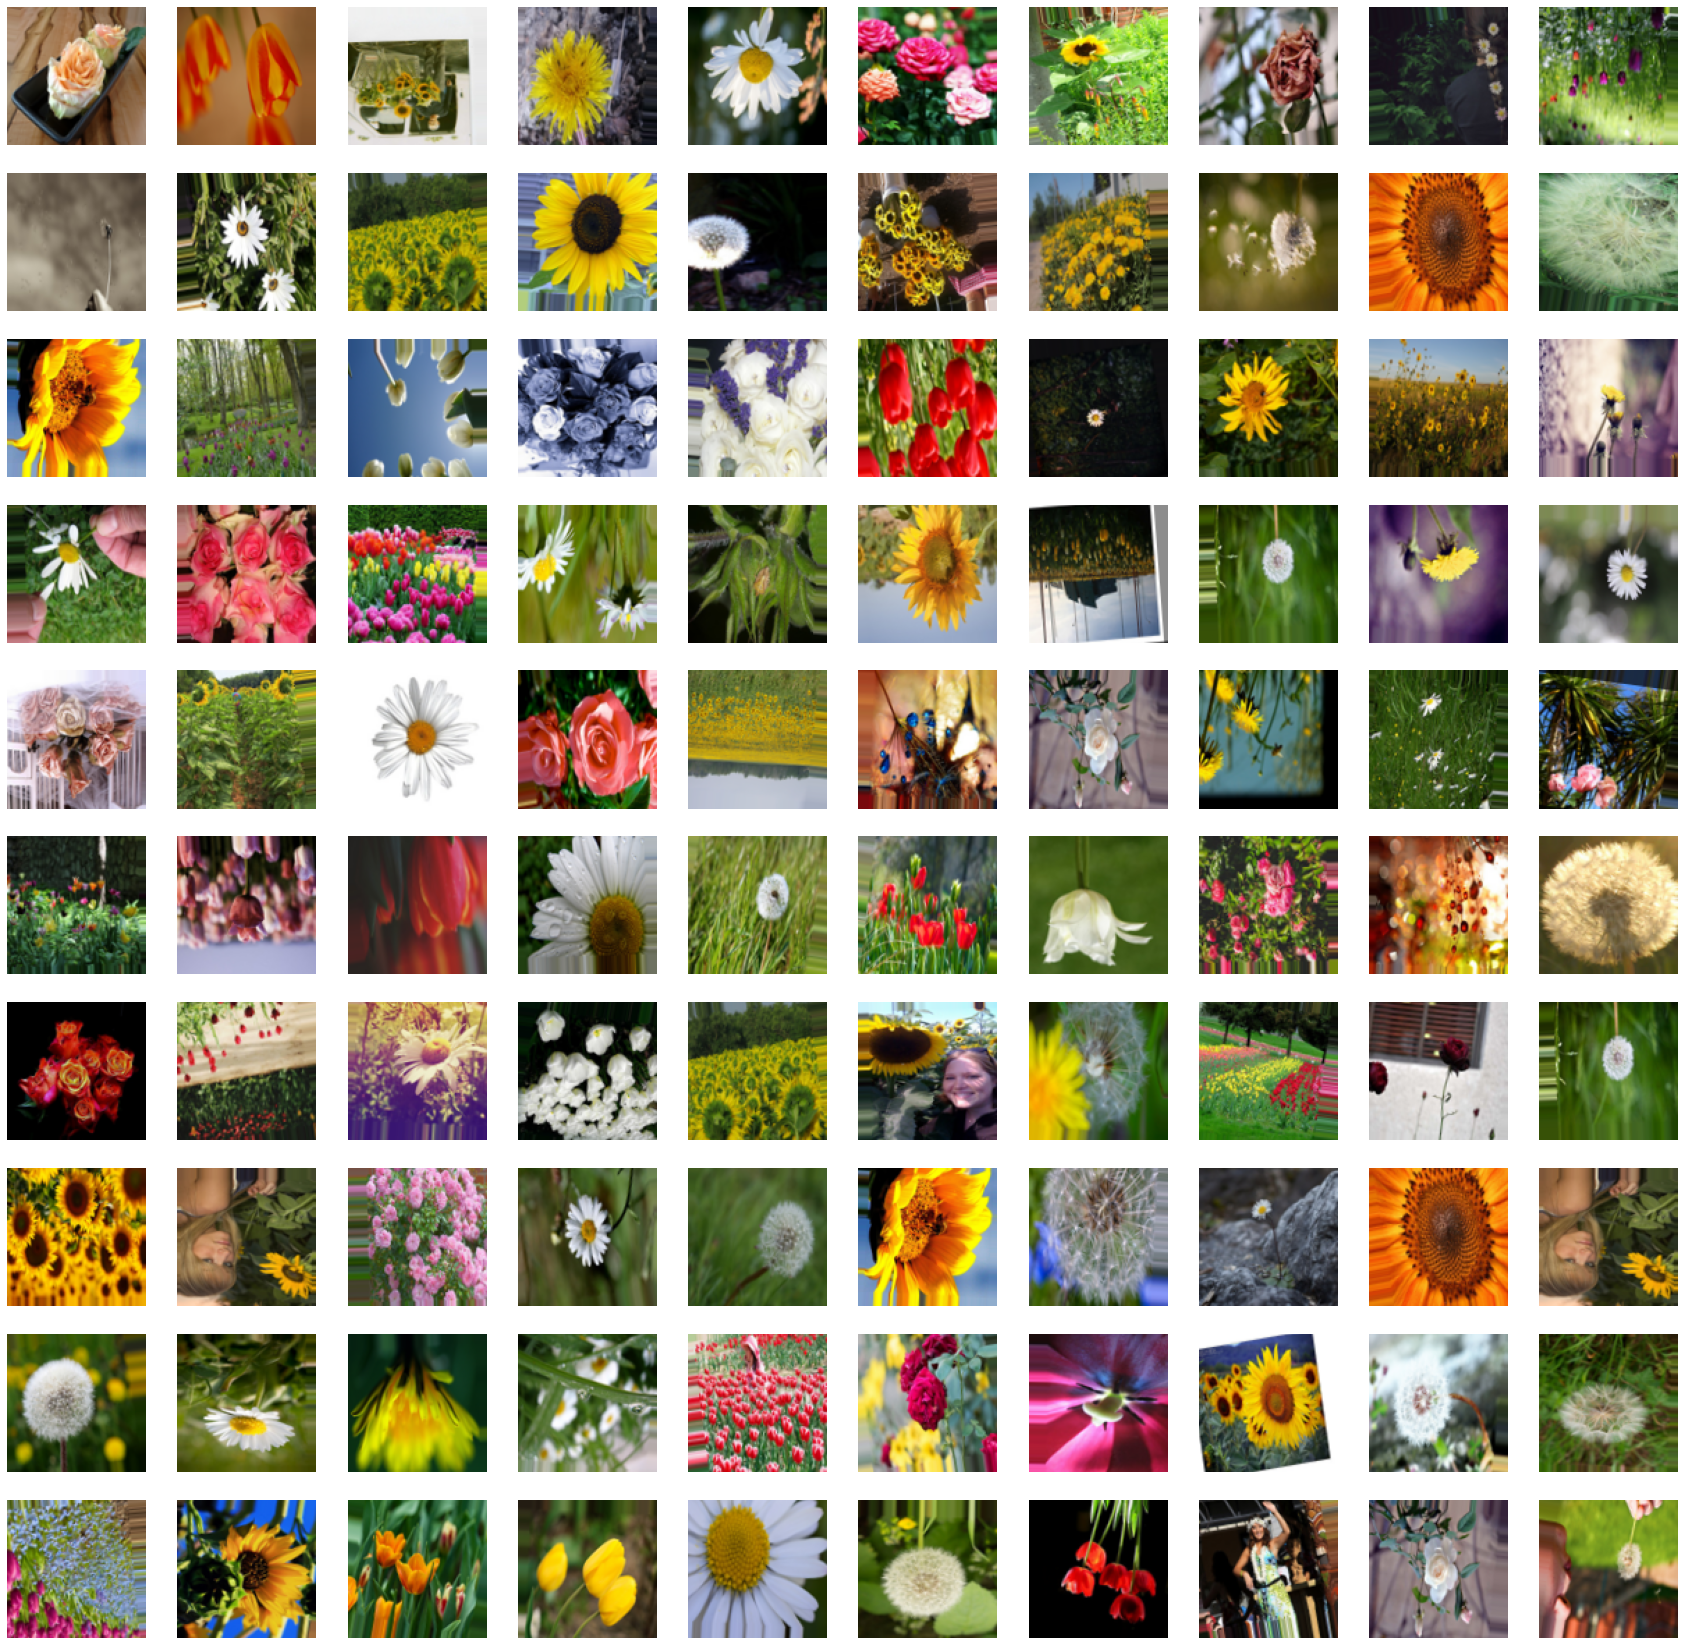

In [55]:
plt.figure(figsize=(30,30))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    i = np.random.choice(1726, replace = False)
    plt.imshow(x_augmented[i])
plt.show()

In [56]:
# 독립변수의 결합과정 
train_x = np.concatenate((train_x, x_augmented))
# 종속변수의 결합과정
train_y = np.concatenate((train_y, y_augmented))

print(train_x.shape)
print(train_y.shape)

(5179, 100, 100, 3)
(5179, 5)


In [57]:
# 텐서플로우 내부에 내장된 모바일넷 V2 불러오는 코드 
from tensorflow.keras.applications import MobileNetV2
# 함수형방식으로 계층을 쌓아주는 방식의 함수(Input)
from tensorflow.keras.layers import Input

In [58]:
!nvidia-smi

Tue Sep  7 21:37:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 462.31       Driver Version: 462.31       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 165... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   62C    P8     4W /  N/A |   1715MiB /  4096MiB |     38%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [61]:
tf.keras.utils.get_file('labels.csv','http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('train.zip','http://bit.ly/31nIyel')
tf.keras.utils.get_file('test.zip','http://bit.ly/2GHEsnO')

362848256/362841195 [==============================] - 45s 0us/step


'C:\\Users\\JH\\.keras\\datasets\\test.zip'

In [62]:
!unzip train.zip
!unzip test.zip

'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
